<a href="https://colab.research.google.com/github/Captsahil/MRM-Class-activity/blob/main/AirBnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

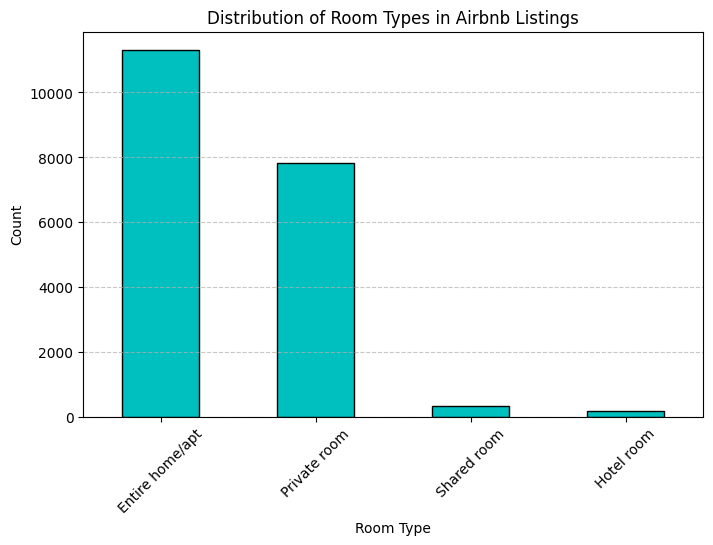

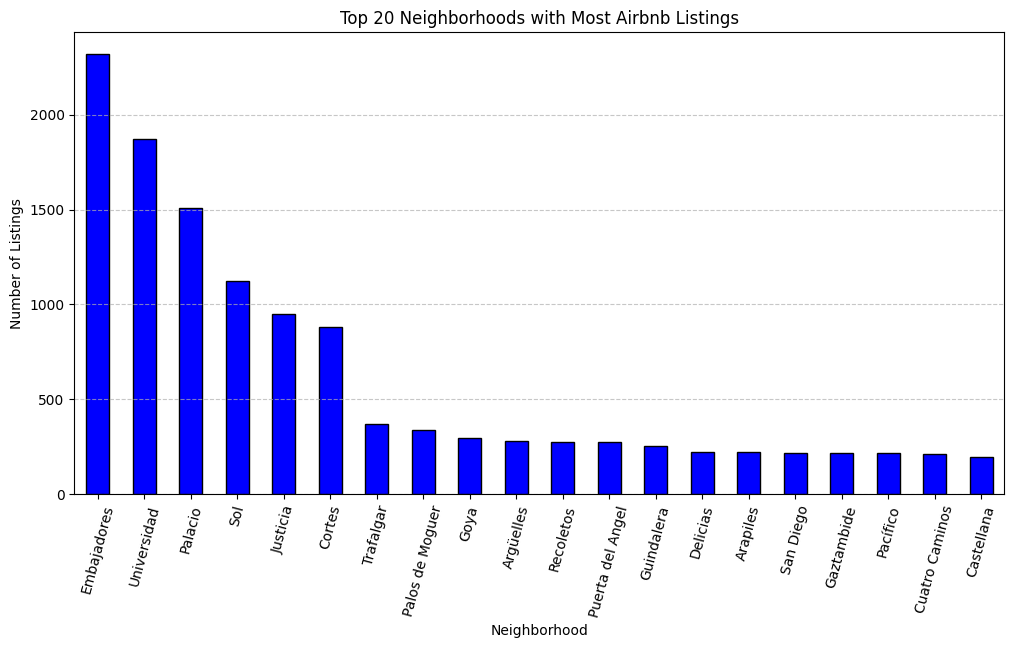

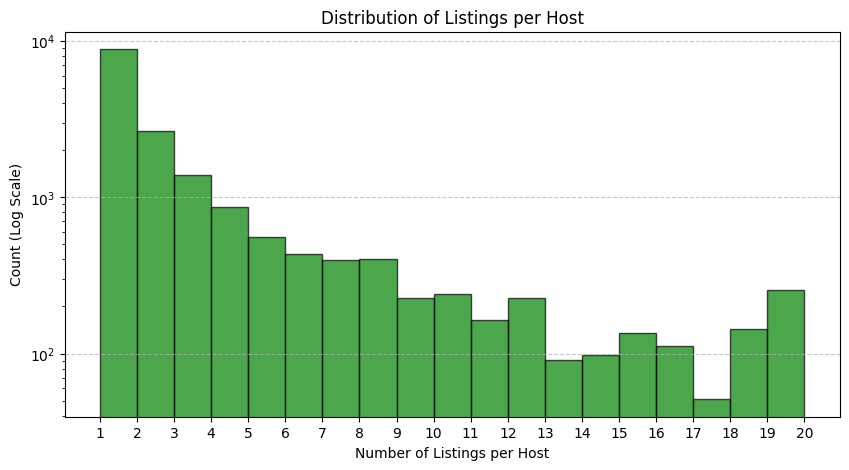

TypeError: agg function failed [how->mean,dtype->object]

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from textblob import TextBlob
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Load dataset (Ensure the file is uploaded in Colab)
file_path = "listings_detailed.csv"  # Change path if needed
df = pd.read_csv(file_path)

### 1. Checking Room Type Distribution ###
plt.figure(figsize=(8, 5))
df['room_type'].value_counts().plot(kind='bar', color='c', edgecolor='k')
plt.title('Distribution of Room Types in Airbnb Listings')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 2. Distribution Across Neighborhoods ###
plt.figure(figsize=(12, 6))
df['neighbourhood_cleansed'].value_counts().head(20).plot(kind='bar', color='b', edgecolor='k')
plt.title('Top 20 Neighborhoods with Most Airbnb Listings')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=75)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 3. Ownership Trends ###
plt.figure(figsize=(10, 5))
plt.hist(df['calculated_host_listings_count'], bins=range(1, 21), edgecolor='k', alpha=0.7, color='g')
plt.yscale('log')
plt.title('Distribution of Listings per Host')
plt.xlabel('Number of Listings per Host')
plt.ylabel('Count (Log Scale)')
plt.xticks(range(1, 21))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 4. Detecting Language of Listings ###
def classify_language(text):
    if not isinstance(text, str):
        return np.nan
    words = set(re.findall(r'\b\w+\b', text.lower()))
    eng_words = {"the", "and", "is", "in", "you", "that"}
    spa_words = {"el", "y", "es", "en", "para", "con"}

    eng_matches = len(words & eng_words)
    spa_matches = len(words & spa_words)

    if eng_matches > spa_matches:
        return 'en'
    elif spa_matches > eng_matches:
        return 'es'
    return 'unknown'

df['language'] = df['description'].dropna().apply(classify_language)
price_by_language = df.groupby('language')['price'].mean()

plt.figure(figsize=(8, 5))
price_by_language.sort_values().plot(kind='bar', color='r', edgecolor='k')
plt.title('Average Airbnb Price by Listing Language')
plt.xlabel('Detected Language of Listing')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# T-test for price difference
english_prices = df[df['language'] == 'en']['price']
spanish_prices = df[df['language'] == 'es']['price']
t_stat, p_value = ttest_ind(english_prices.dropna(), spanish_prices.dropna(), equal_var=False)
print(f"P-value for price difference (English vs. Spanish): {p_value}")

### 5. Regression Analysis on Price Influences ###
# Convert price to numeric
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Selecting relevant features
features = ['accommodates', 'host_identity_verified', 'bathrooms_text', 'bedrooms', 'beds', 'review_scores_rating']
df = df.dropna(subset=features + ['price'])

# Encoding categorical variables
df['host_identity_verified'] = df['host_identity_verified'].map({'t': 1, 'f': 0})
df['bathrooms'] = df['bathrooms_text'].str.extract(r'(\d+(\.\d+)?)').astype(float)

X = df[['accommodates', 'host_identity_verified', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']]
y = df['price']

# Regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Model summary using statsmodels
X_sm = sm.add_constant(X)  # Add constant for intercept
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())


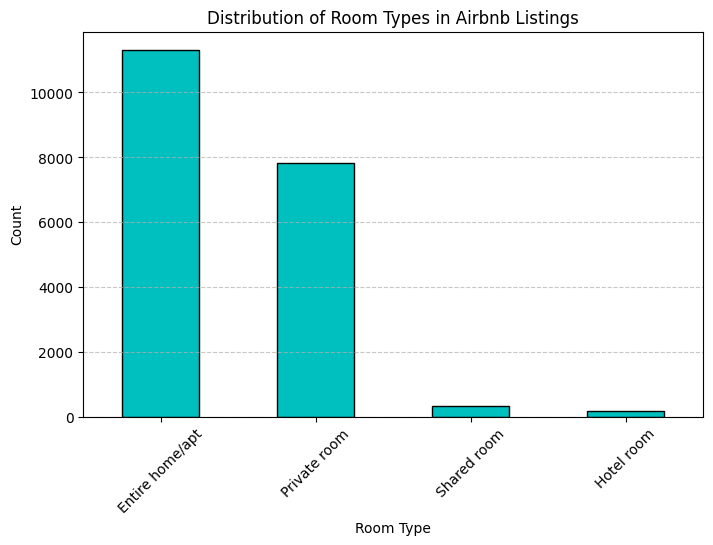

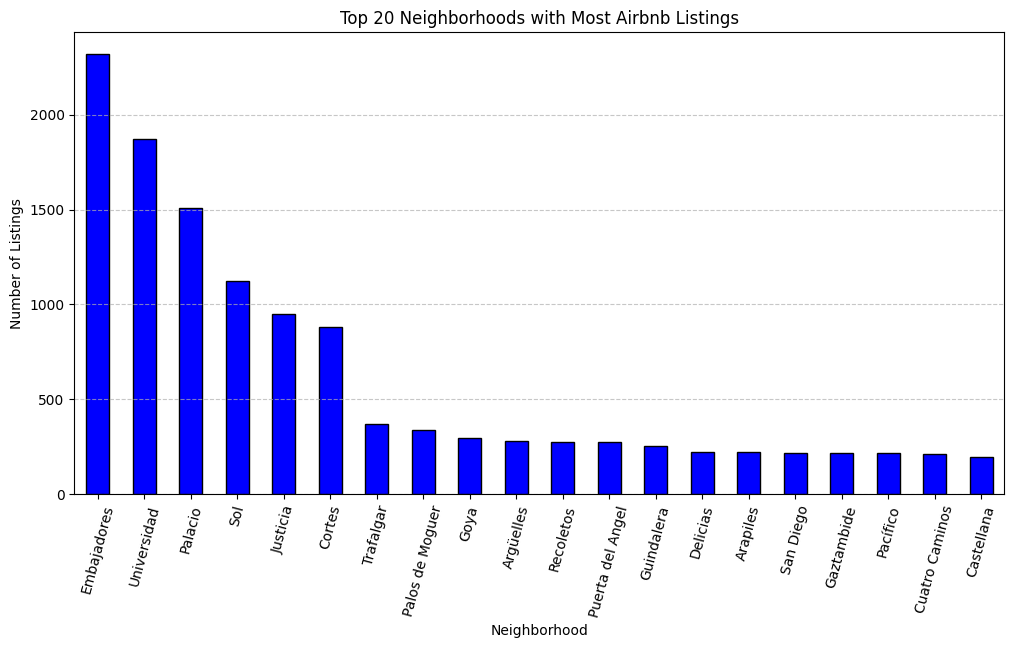

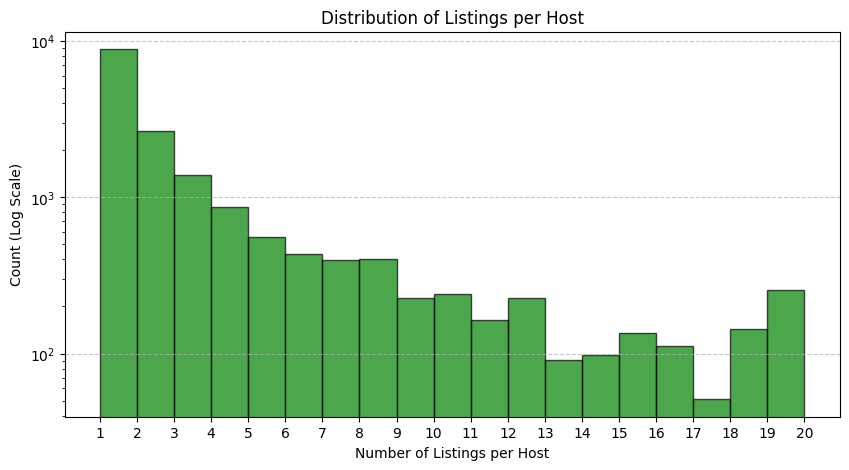

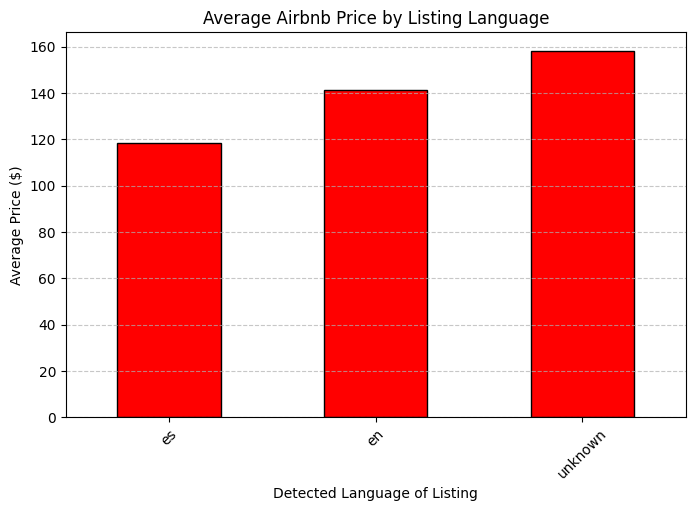

P-value for price difference (English vs. Spanish): 0.0024685807377959608


<ipython-input-2-668b1b1dd2bd>:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_identity_verified'] = df['host_identity_verified'].map({'t': 1, 'f': 0})


ValueError: Columns must be same length as key

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from textblob import TextBlob
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Load dataset (Ensure the file is uploaded in Colab)
file_path = "listings_detailed.csv"  # Change path if needed
df = pd.read_csv(file_path)

# Convert price column to numeric
df['price'] = df['price'].replace('[\$,]', '', regex=True).replace(',', '', regex=True).astype(float)

### 1. Checking Room Type Distribution ###
plt.figure(figsize=(8, 5))
df['room_type'].value_counts().plot(kind='bar', color='c', edgecolor='k')
plt.title('Distribution of Room Types in Airbnb Listings')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 2. Distribution Across Neighborhoods ###
plt.figure(figsize=(12, 6))
df['neighbourhood_cleansed'].value_counts().head(20).plot(kind='bar', color='b', edgecolor='k')
plt.title('Top 20 Neighborhoods with Most Airbnb Listings')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=75)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 3. Ownership Trends ###
plt.figure(figsize=(10, 5))
plt.hist(df['calculated_host_listings_count'], bins=range(1, 21), edgecolor='k', alpha=0.7, color='g')
plt.yscale('log')
plt.title('Distribution of Listings per Host')
plt.xlabel('Number of Listings per Host')
plt.ylabel('Count (Log Scale)')
plt.xticks(range(1, 21))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 4. Detecting Language of Listings ###
def classify_language(text):
    if not isinstance(text, str):
        return np.nan
    words = set(re.findall(r'\b\w+\b', text.lower()))
    eng_words = {"the", "and", "is", "in", "you", "that"}
    spa_words = {"el", "y", "es", "en", "para", "con"}

    eng_matches = len(words & eng_words)
    spa_matches = len(words & spa_words)

    if eng_matches > spa_matches:
        return 'en'
    elif spa_matches > eng_matches:
        return 'es'
    return 'unknown'

df['language'] = df['description'].dropna().apply(classify_language)
price_by_language = df.groupby('language')['price'].mean()

plt.figure(figsize=(8, 5))
price_by_language.sort_values().plot(kind='bar', color='r', edgecolor='k')
plt.title('Average Airbnb Price by Listing Language')
plt.xlabel('Detected Language of Listing')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# T-test for price difference
english_prices = df[df['language'] == 'en']['price']
spanish_prices = df[df['language'] == 'es']['price']
t_stat, p_value = ttest_ind(english_prices.dropna(), spanish_prices.dropna(), equal_var=False)
print(f"P-value for price difference (English vs. Spanish): {p_value}")

### 5. Regression Analysis on Price Influences ###

# Selecting relevant features
features = ['accommodates', 'host_identity_verified', 'bathrooms_text', 'bedrooms', 'beds', 'review_scores_rating']
df = df.dropna(subset=features + ['price'])

# Encoding categorical variables
df['host_identity_verified'] = df['host_identity_verified'].map({'t': 1, 'f': 0})
df['bathrooms'] = df['bathrooms_text'].str.extract(r'(\d+(\.\d+)?)').astype(float)

X = df[['accommodates', 'host_identity_verified', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']]
y = df['price']

# Regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Model summary using statsmodels
X_sm = sm.add_constant(X)  # Add constant for intercept
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())


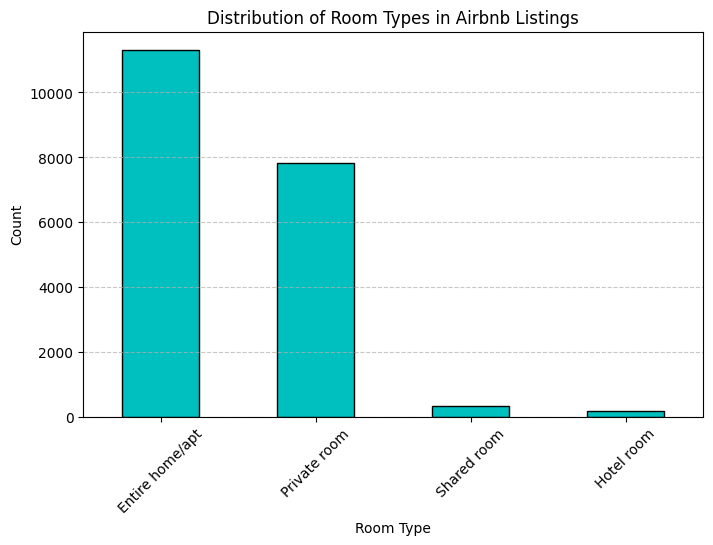

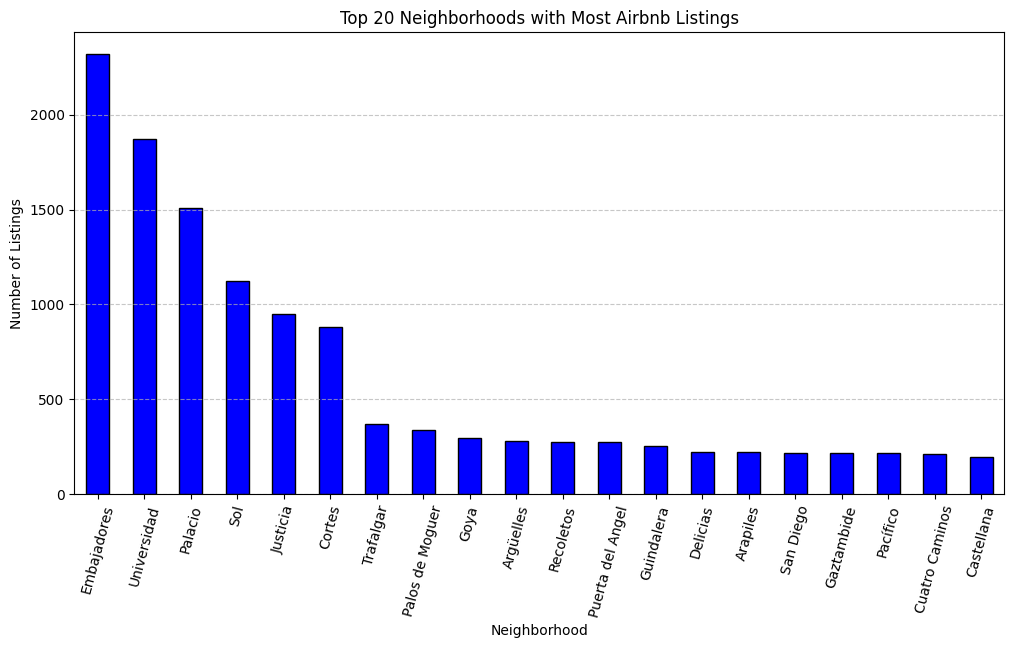

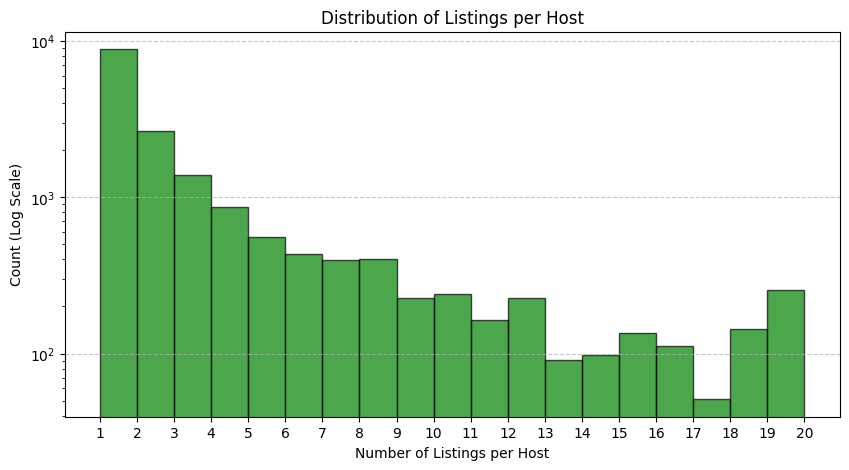

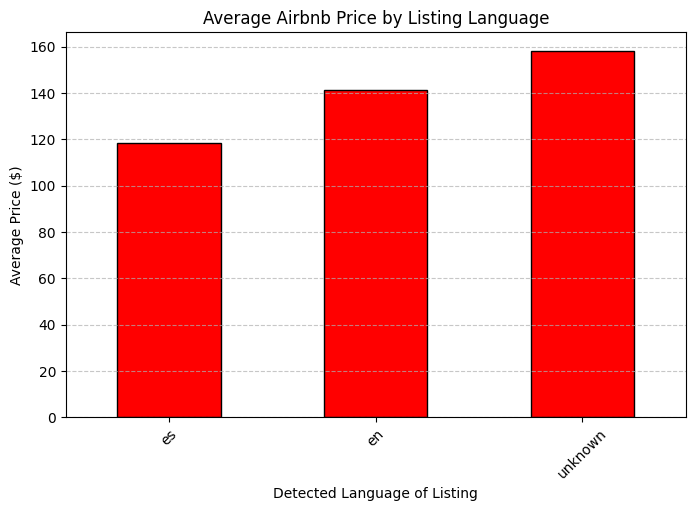

P-value for price difference (English vs. Spanish): 0.0024685807377959608


<ipython-input-3-168af9c44752>:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_identity_verified'] = df['host_identity_verified'].map({'t': 1, 'f': 0})


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from textblob import TextBlob
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Load dataset (Ensure the file is uploaded in Colab)
file_path = "listings_detailed.csv"  # Change path if needed
df = pd.read_csv(file_path)

# Convert price column to numeric
df['price'] = df['price'].replace('[\$,]', '', regex=True).replace(',', '', regex=True).astype(float)

### 1. Checking Room Type Distribution ###
plt.figure(figsize=(8, 5))
df['room_type'].value_counts().plot(kind='bar', color='c', edgecolor='k')
plt.title('Distribution of Room Types in Airbnb Listings')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 2. Distribution Across Neighborhoods ###
plt.figure(figsize=(12, 6))
df['neighbourhood_cleansed'].value_counts().head(20).plot(kind='bar', color='b', edgecolor='k')
plt.title('Top 20 Neighborhoods with Most Airbnb Listings')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=75)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 3. Ownership Trends ###
plt.figure(figsize=(10, 5))
plt.hist(df['calculated_host_listings_count'], bins=range(1, 21), edgecolor='k', alpha=0.7, color='g')
plt.yscale('log')
plt.title('Distribution of Listings per Host')
plt.xlabel('Number of Listings per Host')
plt.ylabel('Count (Log Scale)')
plt.xticks(range(1, 21))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 4. Detecting Language of Listings ###
def classify_language(text):
    if not isinstance(text, str):
        return np.nan
    words = set(re.findall(r'\b\w+\b', text.lower()))
    eng_words = {"the", "and", "is", "in", "you", "that"}
    spa_words = {"el", "y", "es", "en", "para", "con"}

    eng_matches = len(words & eng_words)
    spa_matches = len(words & spa_words)

    if eng_matches > spa_matches:
        return 'en'
    elif spa_matches > eng_matches:
        return 'es'
    return 'unknown'

df['language'] = df['description'].dropna().apply(classify_language)
price_by_language = df.groupby('language')['price'].mean()

plt.figure(figsize=(8, 5))
price_by_language.sort_values().plot(kind='bar', color='r', edgecolor='k')
plt.title('Average Airbnb Price by Listing Language')
plt.xlabel('Detected Language of Listing')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# T-test for price difference
english_prices = df[df['language'] == 'en']['price']
spanish_prices = df[df['language'] == 'es']['price']
t_stat, p_value = ttest_ind(english_prices.dropna(), spanish_prices.dropna(), equal_var=False)
print(f"P-value for price difference (English vs. Spanish): {p_value}")

### 5. Regression Analysis on Price Influences ###

# Selecting relevant features
features = ['accommodates', 'host_identity_verified', 'bathrooms_text', 'bedrooms', 'beds', 'review_scores_rating']
df = df.dropna(subset=features + ['price'])

# Encoding categorical variables
df['host_identity_verified'] = df['host_identity_verified'].map({'t': 1, 'f': 0})
df['bathrooms'] = df['bathrooms_text'].str.extract(r'(\d+(\.\d+)?)', expand=False)[0].astype(float)

X = df[['accommodates', 'host_identity_verified', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']]
y = df['price']

# Regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Model summary using statsmodels
X_sm = sm.add_constant(X)  # Add constant for intercept
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())


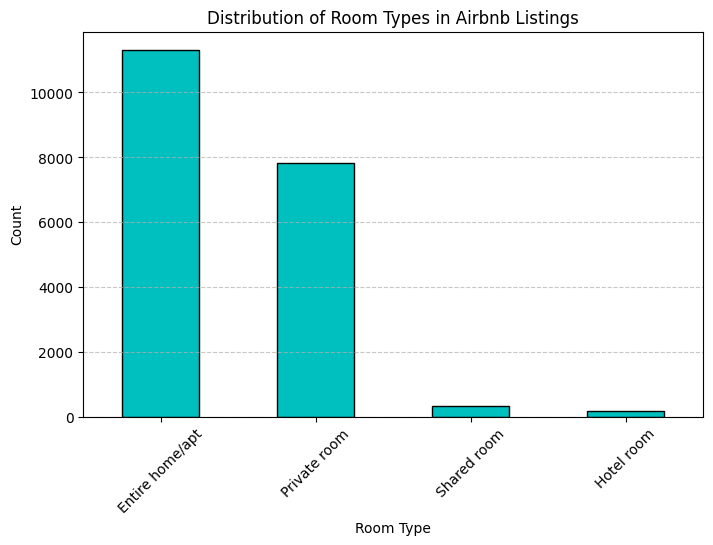

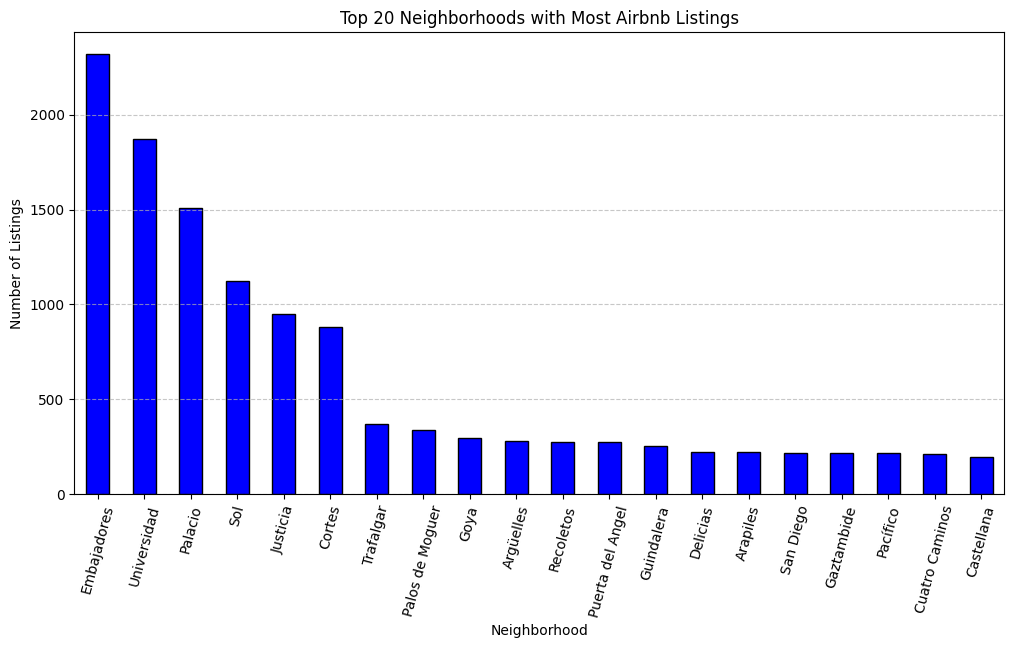

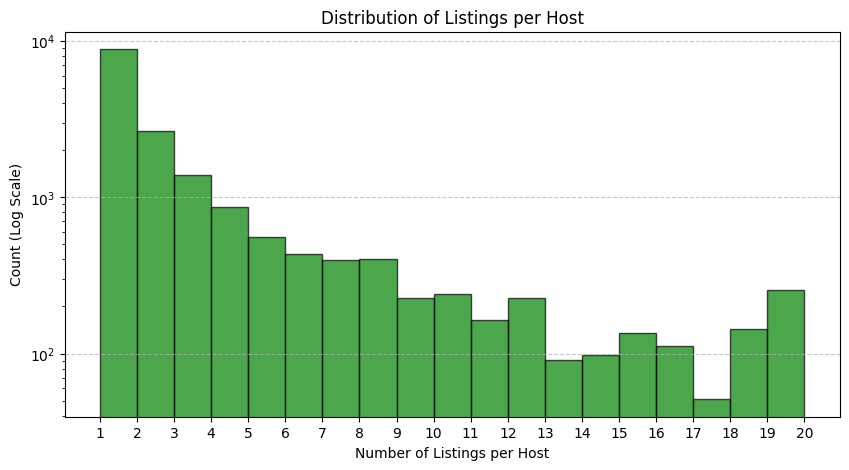

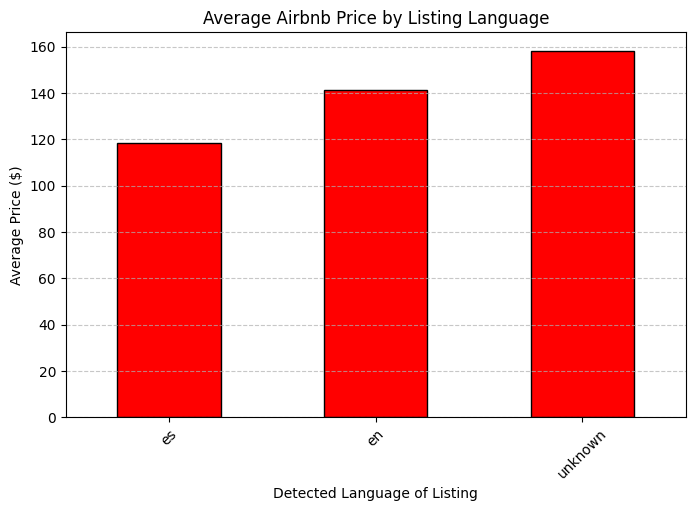

P-value for price difference (English vs. Spanish): 0.0024685807377959608


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from textblob import TextBlob
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Load dataset (Ensure the file is uploaded in Colab)
file_path = "listings_detailed.csv"  # Change path if needed
df = pd.read_csv(file_path)

# Convert price column to numeric
df['price'] = df['price'].replace('[\$,]', '', regex=True).replace(',', '', regex=True).astype(float)

### 1. Checking Room Type Distribution ###
plt.figure(figsize=(8, 5))
df['room_type'].value_counts().plot(kind='bar', color='c', edgecolor='k')
plt.title('Distribution of Room Types in Airbnb Listings')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 2. Distribution Across Neighborhoods ###
plt.figure(figsize=(12, 6))
df['neighbourhood_cleansed'].value_counts().head(20).plot(kind='bar', color='b', edgecolor='k')
plt.title('Top 20 Neighborhoods with Most Airbnb Listings')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=75)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 3. Ownership Trends ###
plt.figure(figsize=(10, 5))
plt.hist(df['calculated_host_listings_count'], bins=range(1, 21), edgecolor='k', alpha=0.7, color='g')
plt.yscale('log')
plt.title('Distribution of Listings per Host')
plt.xlabel('Number of Listings per Host')
plt.ylabel('Count (Log Scale)')
plt.xticks(range(1, 21))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 4. Detecting Language of Listings ###
def classify_language(text):
    if not isinstance(text, str):
        return np.nan
    words = set(re.findall(r'\b\w+\b', text.lower()))
    eng_words = {"the", "and", "is", "in", "you", "that"}
    spa_words = {"el", "y", "es", "en", "para", "con"}

    eng_matches = len(words & eng_words)
    spa_matches = len(words & spa_words)

    if eng_matches > spa_matches:
        return 'en'
    elif spa_matches > eng_matches:
        return 'es'
    return 'unknown'

df['language'] = df['description'].dropna().apply(classify_language)
price_by_language = df.groupby('language')['price'].mean()

plt.figure(figsize=(8, 5))
price_by_language.sort_values().plot(kind='bar', color='r', edgecolor='k')
plt.title('Average Airbnb Price by Listing Language')
plt.xlabel('Detected Language of Listing')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# T-test for price difference
english_prices = df[df['language'] == 'en']['price']
spanish_prices = df[df['language'] == 'es']['price']
t_stat, p_value = ttest_ind(english_prices.dropna(), spanish_prices.dropna(), equal_var=False)
print(f"P-value for price difference (English vs. Spanish): {p_value}")

### 5. Regression Analysis on Price Influences ###

# Selecting relevant features
features = ['accommodates', 'host_identity_verified', 'bathrooms_text', 'bedrooms', 'beds', 'review_scores_rating']

# Handle missing values
df = df.dropna(subset=features + ['price']).copy()

# Encoding categorical variables using .loc to avoid warnings
df.loc[:, 'host_identity_verified'] = df['host_identity_verified'].map({'t': 1, 'f': 0})
df.loc[:, 'bathrooms'] = df['bathrooms_text'].str.extract(r'(\d+(\.\d+)?)', expand=False)[0].astype(float)

# Drop any remaining NaN values
df = df.dropna()

X = df[['accommodates', 'host_identity_verified', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']]
y = df['price']

# Regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Model summary using statsmodels
X_sm = sm.add_constant(X)  # Add constant for intercept
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())

In [7]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=a8b2e3ecce7273a323cdf591bc6aebffe5432fe129ca3860a5c8480a919f3fe2
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


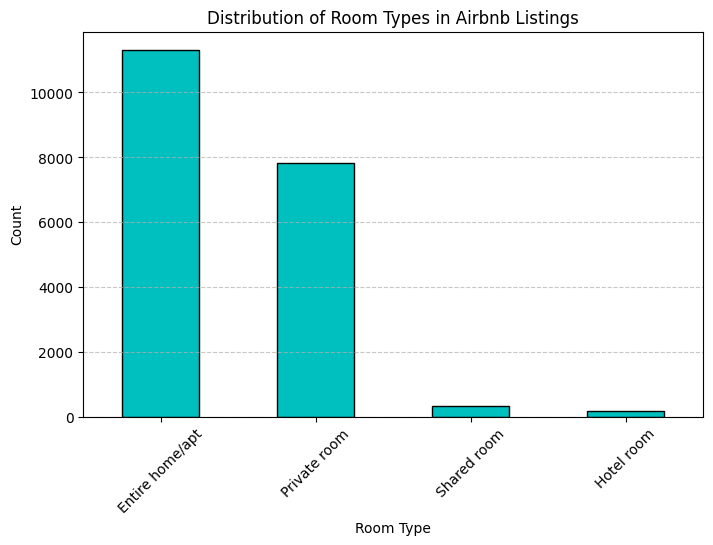

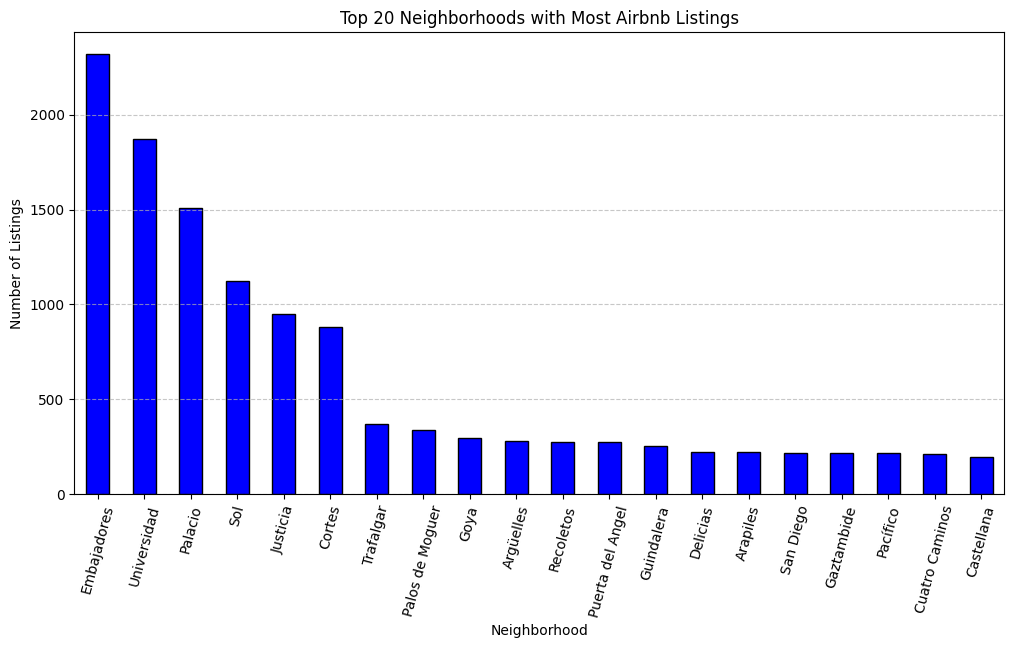

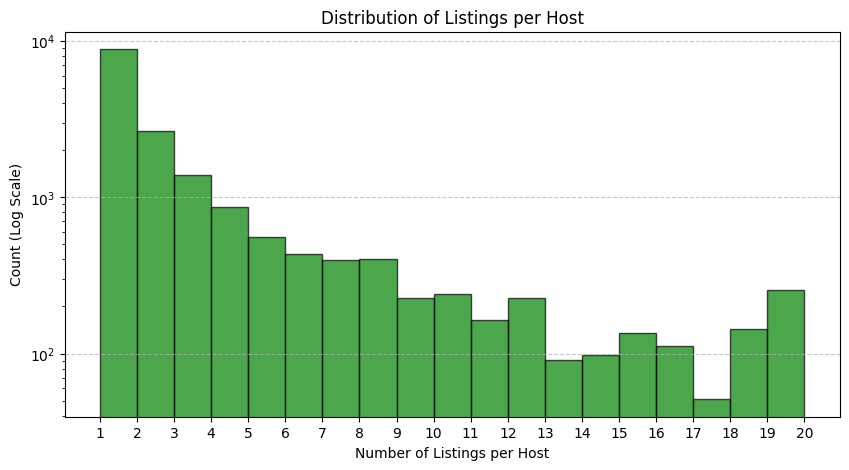

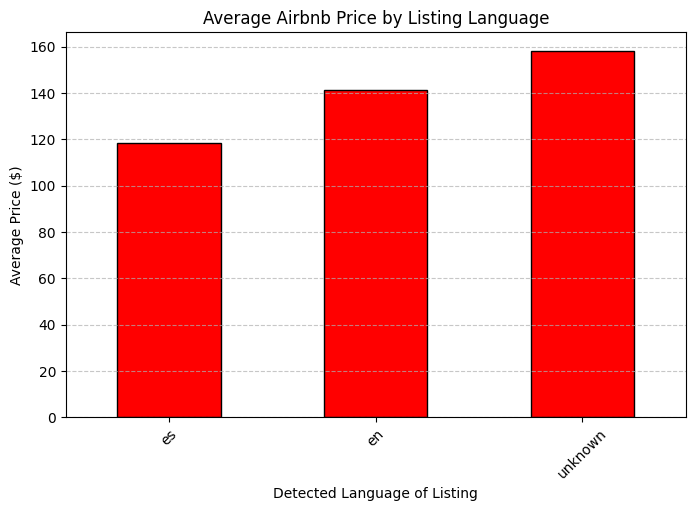

P-value for price difference (English vs. Spanish): 0.0024685807377959608
Dataset shape after cleaning: (12196, 75)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from textblob import TextBlob
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Load dataset (Ensure the file is uploaded in Colab)
file_path = "listings_detailed.csv"  # Change path if needed
df = pd.read_csv(file_path)

# Convert price column to numeric
df['price'] = df['price'].replace('[\$,]', '', regex=True).replace(',', '', regex=True).astype(float)

### 1. Checking Room Type Distribution ###
plt.figure(figsize=(8, 5))
df['room_type'].value_counts().plot(kind='bar', color='c', edgecolor='k')
plt.title('Distribution of Room Types in Airbnb Listings')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 2. Distribution Across Neighborhoods ###
plt.figure(figsize=(12, 6))
df['neighbourhood_cleansed'].value_counts().head(20).plot(kind='bar', color='b', edgecolor='k')
plt.title('Top 20 Neighborhoods with Most Airbnb Listings')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=75)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 3. Ownership Trends ###
plt.figure(figsize=(10, 5))
plt.hist(df['calculated_host_listings_count'], bins=range(1, 21), edgecolor='k', alpha=0.7, color='g')
plt.yscale('log')
plt.title('Distribution of Listings per Host')
plt.xlabel('Number of Listings per Host')
plt.ylabel('Count (Log Scale)')
plt.xticks(range(1, 21))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 4. Detecting Language of Listings ###
def classify_language(text):
    if not isinstance(text, str):
        return np.nan
    words = set(re.findall(r'\b\w+\b', text.lower()))
    eng_words = {"the", "and", "is", "in", "you", "that"}
    spa_words = {"el", "y", "es", "en", "para", "con"}

    eng_matches = len(words & eng_words)
    spa_matches = len(words & spa_words)

    if eng_matches > spa_matches:
        return 'en'
    elif spa_matches > eng_matches:
        return 'es'
    return 'unknown'

df['language'] = df['description'].dropna().apply(classify_language)
price_by_language = df.groupby('language')['price'].mean()

plt.figure(figsize=(8, 5))
price_by_language.sort_values().plot(kind='bar', color='r', edgecolor='k')
plt.title('Average Airbnb Price by Listing Language')
plt.xlabel('Detected Language of Listing')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# T-test for price difference
english_prices = df[df['language'] == 'en']['price']
spanish_prices = df[df['language'] == 'es']['price']
t_stat, p_value = ttest_ind(english_prices.dropna(), spanish_prices.dropna(), equal_var=False)
print(f"P-value for price difference (English vs. Spanish): {p_value}")

### 5. Regression Analysis on Price Influences ###

# Selecting relevant features
features = ['accommodates', 'host_identity_verified', 'bathrooms_text', 'bedrooms', 'beds', 'review_scores_rating']

# Handle missing values
df = df.copy()
df = df.dropna(subset=['price'])

# Encoding categorical variables using .loc to avoid warnings
df.loc[:, 'host_identity_verified'] = df['host_identity_verified'].map({'t': 1, 'f': 0})
df.loc[:, 'bathrooms'] = df['bathrooms_text'].str.extract(r'(\d+(\.\d+)?)', expand=False)[0].astype(float)

# Drop remaining NaNs in feature set
df = df.dropna(subset=features)

# Print shape to verify data availability
print("Dataset shape after cleaning:", df.shape)

# Ensure we have enough data
if df.shape[0] < 10:
    raise ValueError("Not enough data after filtering. Check missing values in critical columns.")

X = df[['accommodates', 'host_identity_verified', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']]
y = df['price']

# Regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Model summary using statsmodels
X_sm = sm.add_constant(X)  # Add constant for intercept
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())


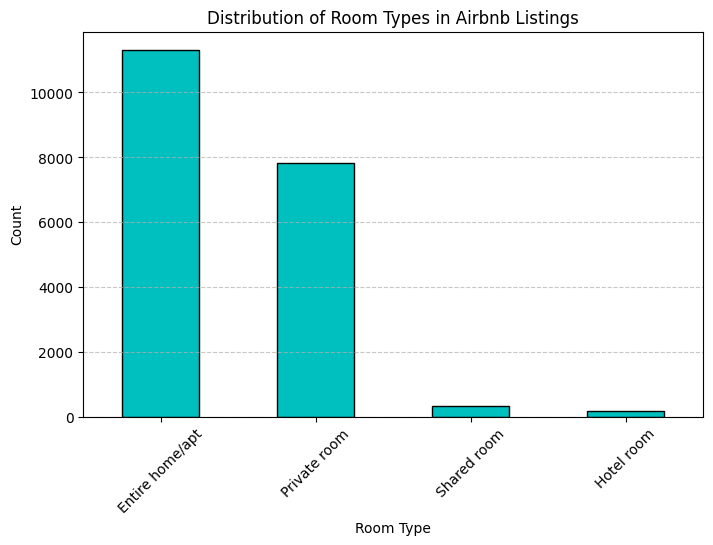

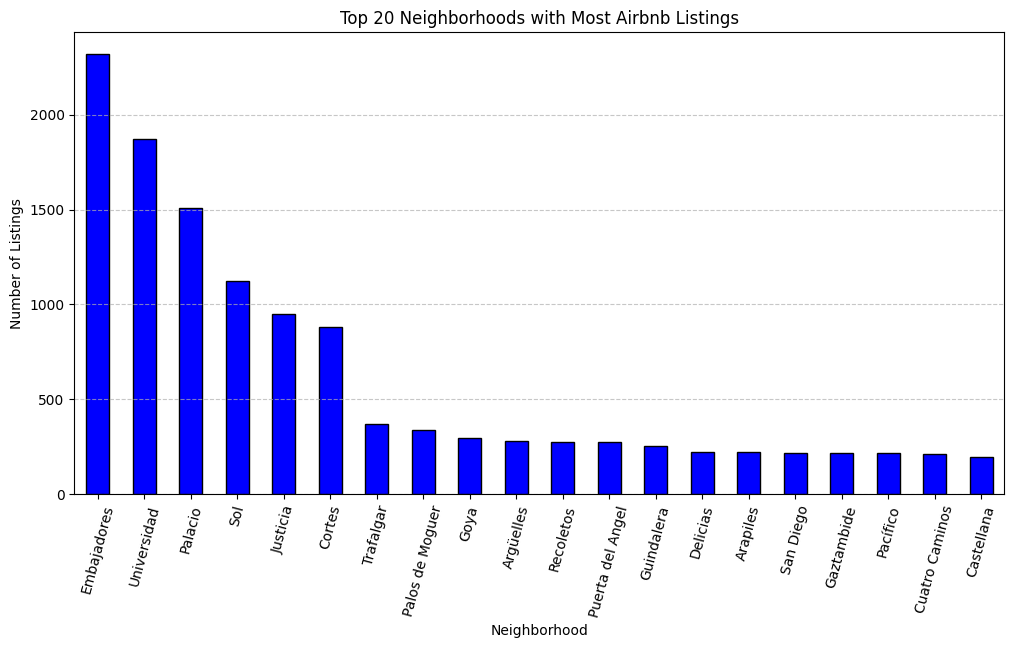

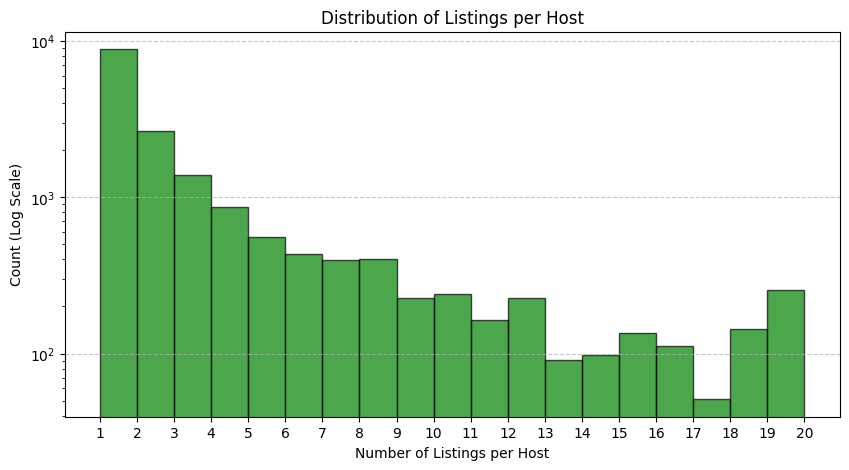

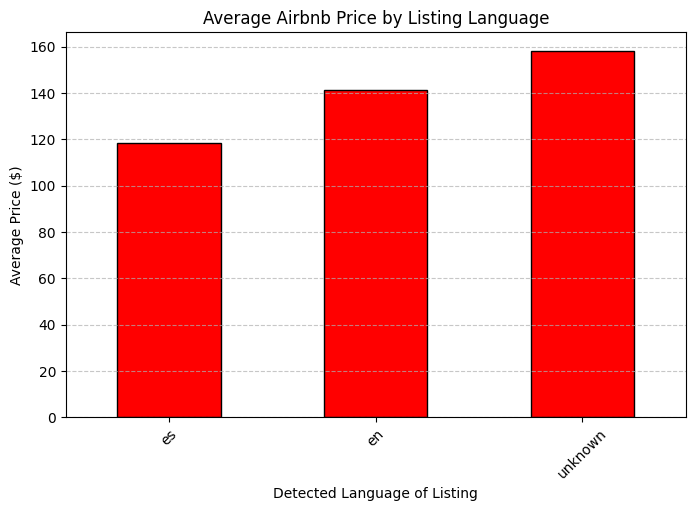

P-value for price difference (English vs. Spanish): 0.0024685807377959608
Missing values in dataset:
accommodates              0
host_identity_verified    0
bathrooms_text            0
bedrooms                  0
beds                      0
review_scores_rating      0
dtype: int64


TypeError: Cannot convert [['https://www.airbnb.com/rooms/6369'
  'https://www.airbnb.com/rooms/21853'
  'https://www.airbnb.com/rooms/26825' ...
  'https://www.airbnb.com/rooms/48978809'
  'https://www.airbnb.com/rooms/48980117'
  'https://www.airbnb.com/rooms/48991692']
 ['2021-04-15' '2021-04-16' '2021-04-15' ... '2021-04-16' '2021-04-15'
  '2021-04-16']
 ['Rooftop terrace room ,  ensuite bathroom' 'Bright and airy room'
  'Single Room whith private Bathroom' ...
  'Acogedora habitación en el centro de Madrid' 'Chueca Apartament.'
  'Piso en Plaza de toros Ventas con baños privados']
 ...
 [nan nan nan ... nan nan nan]
 ['f' 'f' 'f' ... 't' 'f' 'f']
 ['en' 'en' 'en' ... 'es' 'unknown' nan]] to numeric

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from textblob import TextBlob
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Load dataset (Ensure the file is uploaded in Colab)
file_path = "listings_detailed.csv"  # Change path if needed
df = pd.read_csv(file_path)

# Convert price column to numeric
df['price'] = df['price'].replace('[\$,]', '', regex=True).replace(',', '', regex=True).astype(float)

### 1. Checking Room Type Distribution ###
plt.figure(figsize=(8, 5))
df['room_type'].value_counts().plot(kind='bar', color='c', edgecolor='k')
plt.title('Distribution of Room Types in Airbnb Listings')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 2. Distribution Across Neighborhoods ###
plt.figure(figsize=(12, 6))
df['neighbourhood_cleansed'].value_counts().head(20).plot(kind='bar', color='b', edgecolor='k')
plt.title('Top 20 Neighborhoods with Most Airbnb Listings')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=75)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 3. Ownership Trends ###
plt.figure(figsize=(10, 5))
plt.hist(df['calculated_host_listings_count'], bins=range(1, 21), edgecolor='k', alpha=0.7, color='g')
plt.yscale('log')
plt.title('Distribution of Listings per Host')
plt.xlabel('Number of Listings per Host')
plt.ylabel('Count (Log Scale)')
plt.xticks(range(1, 21))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 4. Detecting Language of Listings ###
def classify_language(text):
    if not isinstance(text, str):
        return np.nan
    words = set(re.findall(r'\b\w+\b', text.lower()))
    eng_words = {"the", "and", "is", "in", "you", "that"}
    spa_words = {"el", "y", "es", "en", "para", "con"}

    eng_matches = len(words & eng_words)
    spa_matches = len(words & spa_words)

    if eng_matches > spa_matches:
        return 'en'
    elif spa_matches > eng_matches:
        return 'es'
    return 'unknown'

df['language'] = df['description'].dropna().apply(classify_language)
price_by_language = df.groupby('language')['price'].mean()

plt.figure(figsize=(8, 5))
price_by_language.sort_values().plot(kind='bar', color='r', edgecolor='k')
plt.title('Average Airbnb Price by Listing Language')
plt.xlabel('Detected Language of Listing')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# T-test for price difference
english_prices = df[df['language'] == 'en']['price']
spanish_prices = df[df['language'] == 'es']['price']
t_stat, p_value = ttest_ind(english_prices.dropna(), spanish_prices.dropna(), equal_var=False)
print(f"P-value for price difference (English vs. Spanish): {p_value}")

### 5. Regression Analysis on Price Influences ###

# Selecting relevant features
features = ['accommodates', 'host_identity_verified', 'bathrooms_text', 'bedrooms', 'beds', 'review_scores_rating']

# Handle missing values
df = df.copy()
df = df.dropna(subset=['price'])

# Encoding categorical variables using .loc to avoid warnings
df.loc[:, 'host_identity_verified'] = df['host_identity_verified'].map({'t': 1, 'f': 0})
df.loc[:, 'bathrooms'] = df['bathrooms_text'].str.extract(r'(\d+(\.\d+)?)', expand=False)[0].astype(float)

# Drop remaining NaNs in feature set
df = df.dropna(subset=features)

# Print missing values summary
print("Missing values in dataset:")
print(df[features].isnull().sum())

# Fill remaining NaNs with median values to prevent errors
df.fillna(df.median(), inplace=True)

# Print shape to verify data availability
print("Dataset shape after cleaning:", df.shape)

# Ensure we have enough data
if df.shape[0] < 10:
    raise ValueError("Not enough data after filtering. Check missing values in critical columns.")

X = df[['accommodates', 'host_identity_verified', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']]
y = df['price']

# Regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Model summary using statsmodels
X_sm = sm.add_constant(X)  # Add constant for intercept
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())

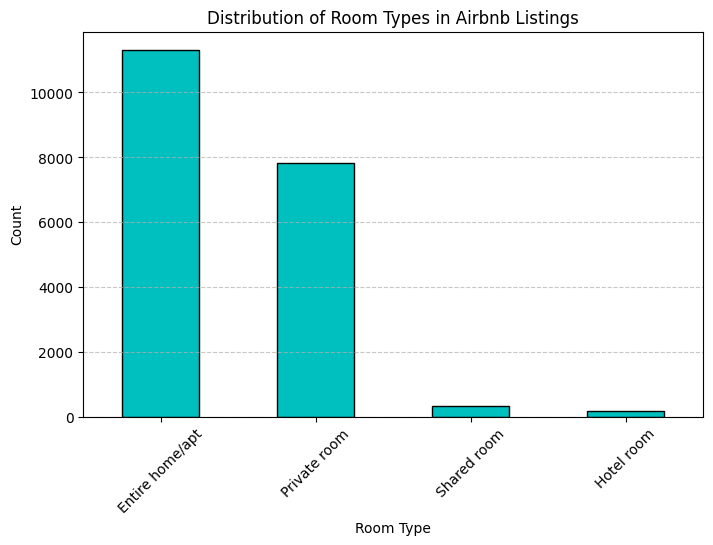

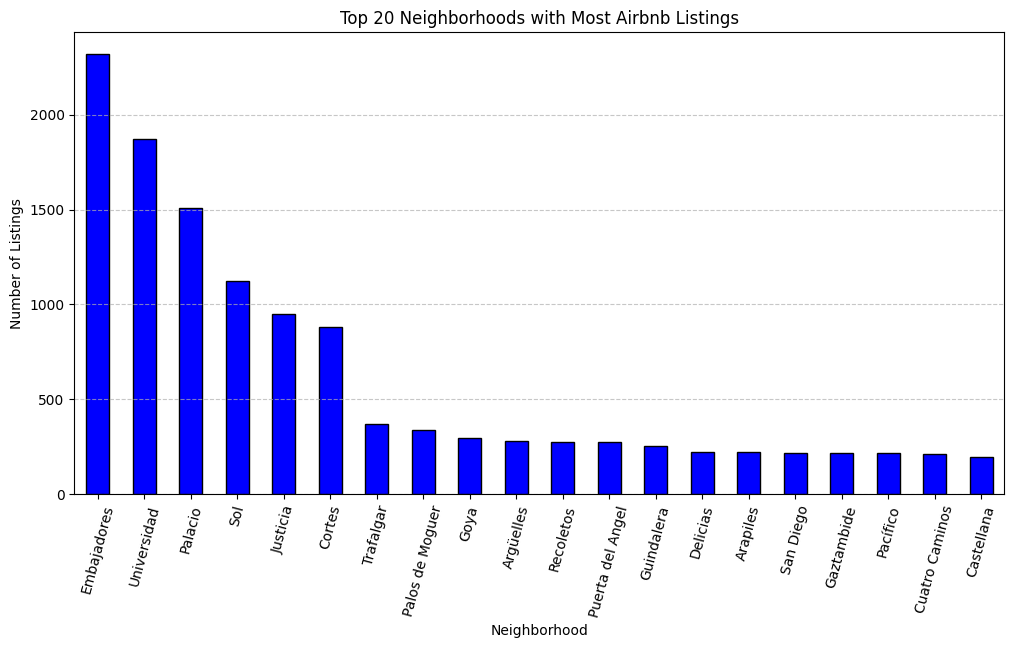

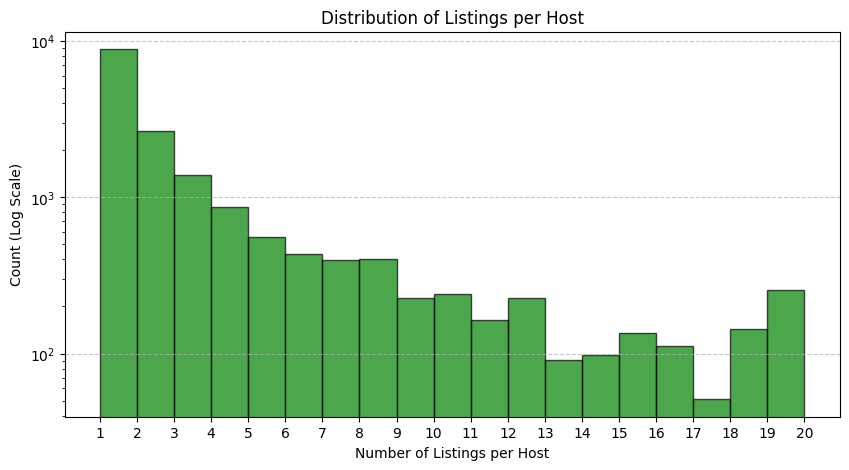

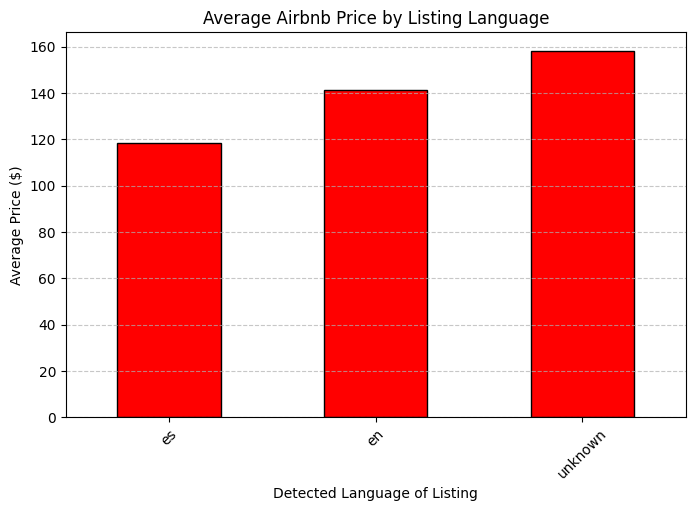

P-value for price difference (English vs. Spanish): 0.0024685807377959608


TypeError: Cannot convert [['https://www.airbnb.com/rooms/6369'
  'https://www.airbnb.com/rooms/21853'
  'https://www.airbnb.com/rooms/26825' ...
  'https://www.airbnb.com/rooms/48978809'
  'https://www.airbnb.com/rooms/48980117'
  'https://www.airbnb.com/rooms/48991692']
 ['2021-04-15' '2021-04-16' '2021-04-15' ... '2021-04-16' '2021-04-15'
  '2021-04-16']
 ['Rooftop terrace room ,  ensuite bathroom' 'Bright and airy room'
  'Single Room whith private Bathroom' ...
  'Acogedora habitación en el centro de Madrid' 'Chueca Apartament.'
  'Piso en Plaza de toros Ventas con baños privados']
 ...
 [nan nan nan ... nan nan nan]
 ['f' 'f' 'f' ... 't' 'f' 'f']
 ['en' 'en' 'en' ... 'es' 'unknown' nan]] to numeric

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from textblob import TextBlob
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Load dataset (Ensure the file is uploaded in Colab)
file_path = "listings_detailed.csv"  # Change path if needed
df = pd.read_csv(file_path)

# Convert price column to numeric
df['price'] = df['price'].replace('[\$,]', '', regex=True).replace(',', '', regex=True).astype(float)

### 1. Checking Room Type Distribution ###
def analyze_room_type(df):
    plt.figure(figsize=(8, 5))
    df['room_type'].value_counts().plot(kind='bar', color='c', edgecolor='k')
    plt.title('Distribution of Room Types in Airbnb Listings')
    plt.xlabel('Room Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

analyze_room_type(df)

### 2. Distribution Across Neighborhoods ###
def analyze_neighborhood_distribution(df):
    plt.figure(figsize=(12, 6))
    df['neighbourhood_cleansed'].value_counts().head(20).plot(kind='bar', color='b', edgecolor='k')
    plt.title('Top 20 Neighborhoods with Most Airbnb Listings')
    plt.xlabel('Neighborhood')
    plt.ylabel('Number of Listings')
    plt.xticks(rotation=75)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

analyze_neighborhood_distribution(df)

### 3. Ownership Trends ###
def analyze_ownership_trends(df):
    plt.figure(figsize=(10, 5))
    plt.hist(df['calculated_host_listings_count'], bins=range(1, 21), edgecolor='k', alpha=0.7, color='g')
    plt.yscale('log')
    plt.title('Distribution of Listings per Host')
    plt.xlabel('Number of Listings per Host')
    plt.ylabel('Count (Log Scale)')
    plt.xticks(range(1, 21))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

analyze_ownership_trends(df)

### 4. Detecting Language of Listings and Price Difference ###
def analyze_language_and_price(df):
    def classify_language(text):
        if not isinstance(text, str):
            return np.nan
        words = set(re.findall(r'\b\w+\b', text.lower()))
        eng_words = {"the", "and", "is", "in", "you", "that"}
        spa_words = {"el", "y", "es", "en", "para", "con"}

        eng_matches = len(words & eng_words)
        spa_matches = len(words & spa_words)

        if eng_matches > spa_matches:
            return 'en'
        elif spa_matches > eng_matches:
            return 'es'
        return 'unknown'

    df['language'] = df['description'].dropna().apply(classify_language)
    price_by_language = df.groupby('language')['price'].mean()

    plt.figure(figsize=(8, 5))
    price_by_language.sort_values().plot(kind='bar', color='r', edgecolor='k')
    plt.title('Average Airbnb Price by Listing Language')
    plt.xlabel('Detected Language of Listing')
    plt.ylabel('Average Price ($)')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    english_prices = df[df['language'] == 'en']['price']
    spanish_prices = df[df['language'] == 'es']['price']
    t_stat, p_value = ttest_ind(english_prices.dropna(), spanish_prices.dropna(), equal_var=False)
    print(f"P-value for price difference (English vs. Spanish): {p_value}")

analyze_language_and_price(df)

### 5. Regression Analysis on Price Influences ###
def analyze_price_influences(df):
    features = ['accommodates', 'host_identity_verified', 'bathrooms_text', 'bedrooms', 'beds', 'review_scores_rating']
    df = df.copy()
    df = df.dropna(subset=['price'])
    df.loc[:, 'host_identity_verified'] = df['host_identity_verified'].map({'t': 1, 'f': 0})
    df.loc[:, 'bathrooms'] = df['bathrooms_text'].str.extract(r'(\d+(\.\d+)?)', expand=False)[0].astype(float)
    df = df.dropna(subset=features)
    df.fillna(df.median(), inplace=True)
    X = df[['accommodates', 'host_identity_verified', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']]
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    X_sm = sm.add_constant(X)
    model_sm = sm.OLS(y, X_sm).fit()
    print(model_sm.summary())

analyze_price_influences(df)


In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset (Make sure the file is uploaded in Colab)
file_path = "listings_detailed.csv"  # Change this path if necessary
df = pd.read_csv(file_path)

# Convert price column to numeric
df['price'] = df['price'].replace('[\$,]', '', regex=True).replace(',', '', regex=True).astype(float)

# Select relevant features
features = ['accommodates', 'host_identity_verified', 'bathrooms_text', 'bedrooms', 'beds', 'review_scores_rating']
df = df.copy()

# Handle missing values for price
df = df.dropna(subset=['price'])

# Encode categorical variables (Convert 't' -> 1 and 'f' -> 0)
df['host_identity_verified'] = df['host_identity_verified'].map({'t': 1, 'f': 0})

# Extract numerical values from bathrooms_text column
df['bathrooms'] = df['bathrooms_text'].str.extract(r'(\d+(\.\d+)?)', expand=False)[0].astype(float)

# Drop remaining NaNs in selected features
df = df.dropna(subset=['accommodates', 'host_identity_verified', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating'])

# Define independent (X) and dependent (y) variables
X = df[['accommodates', 'host_identity_verified', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']]
y = df['price']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get regression summary using statsmodels
X_sm = sm.add_constant(X)  # Add constant for intercept
model_sm = sm.OLS(y, X_sm).fit()

# Display summary
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     51.68
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           3.77e-63
Time:                        06:36:02   Log-Likelihood:                -92732.
No. Observations:               12179   AIC:                         1.855e+05
Df Residuals:                   12172   BIC:                         1.855e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -84